# Challenge (2/8): Datos abiertos del Instituto Nacional de Estadística y Geografía (INEGI)

¡Bien hecho, Dani! En el reto anterior aprendista mucho. Lograste:
1. Identificar una fuente de datos y consultarla.
2. Acceder a los datos descargados y hacer una breve exploración sobre ellos.
3. Formular algunas preguntas.
4. Planear cómo se verá tu dashboard.

Ahora nos toca comenzar a hacer algo de análisis exploratorio, comencemos con algunas gráficas para datos numéricos.

IMPORTANTE: Toma en cuenta las preguntas que planteaste en el reto anterior. Las variables numéricas involucradas en esas preguntas deberían ser exploradas en este reto con las gráficas propuestas.

## 1. Gráficas de distribución

Gráficas sugeridas:
- Histograma
- Distribución de densidad

Completa las siguientes tareas:
1. Selecciona las variables numéricas que consideres relevantes para tus preguntas del primer reto.
2. Construye una gráfica de distribución por cada una de ellas. Recuerda ajustar el número de "cortes" (bins) para observar mejor los valores relevantes en la distribución (solo histogramas).
3. Utiliza el atributo "hue" para que cada histograma represente alguna variable categórica de tu elección.
4. Utiliza el atributo "col" para generar subplots que representen subconjuntos de datos por categoría.

In [2]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting of style
sns.set_theme(context = 'notebook', style = 'darkgrid')

In [4]:
# Carga de datos desde Colab
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Carga del dataframe
%cd /content/drive/MyDrive/Colab Notebooks/conjunto_de_datos/
df = pd.read_csv('denue_inegi_54_.csv', encoding = 'ISO-8859-1') # Categoría de "Servicios profesionales, científicos y técnicos" (2022) del DENUE

# Para los campos de tipo fecha se convirtió el campo fecha_alta de object a date
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], errors = 'coerce', yearfirst=True, infer_datetime_format = True)

df.head()

/content/drive/MyDrive/Colab Notebooks/conjunto_de_datos


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,8525230,01001541310000931000000000U2,11:11 ARQUITECOS,NaN,541310,Servicios de arquitectura,0 a 5 personas,CALLE,GENERAL MIGUEL BARRAGAN,PRIVADA,...,Aguascalientes,0549,21,4498041302.0,CHRISTIAN@1111ARQUITECTOS.COM,WWW.1111ARQUITECTOS.COM,Fijo,21.888813,-102.288903,2019-11-01
1,6905372,01001541510000971000000000U3,5TO COLOR,NaN,541510,Servicios de diseño de sistemas de cómputo y s...,0 a 5 personas,CALLE,MAR CARIBE,CALLE,...,Aguascalientes,2009,18,NaN,5T0COLORESTUDIO@GMAIL.COM,NaN,Fijo,21.898620,-102.313587,2019-11-01
2,6142345,01001236113000073010000000U1,9.15 ARQUITECTOS,NaN,541310,Servicios de arquitectura,11 a 30 personas,CALLE,SIERRA DEL HUMO,AVENIDA,...,Aguascalientes,2259,8,4491290879.0,GERENCIA@9.15ARQ.MX,WWW.915ARQ.MX,Fijo,21.913782,-102.312156,2010-07-01
3,37160,01001541110003931000000000U3,A&A DESPACHO JURIDICO,NaN,541110,Bufetes jurídicos,0 a 5 personas,CALLE,CHICHIMECO,AVENIDA,...,Aguascalientes,0816,43,NaN,ARIASGO@HOTMAIL.COM,NaN,Fijo,21.877087,-102.280368,2014-12-01
4,10599,01001541910000031001000000U8,AB MKT,AB MERCADOTECNIA SC,541910,Servicios de investigación de mercados y encue...,6 a 10 personas,BOULEVARD,LUIS DONALDO COLOSIO,CALLE,...,Aguascalientes,2390,19,4499128611.0,NaN,WWW.ABMERCADOTECNIA.COM,Fijo,21.924182,-102.311750,2010-07-01


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107880 entries, 0 to 107879
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           107880 non-null  int64         
 1   clee         107880 non-null  object        
 2   nom_estab    107880 non-null  object        
 3   raz_social   30169 non-null   object        
 4   codigo_act   107880 non-null  int64         
 5   nombre_act   107880 non-null  object        
 6   per_ocu      107880 non-null  object        
 7   tipo_vial    107199 non-null  object        
 8   nom_vial     107878 non-null  object        
 9   tipo_v_e_1   107321 non-null  object        
 10  nom_v_e_1    107687 non-null  object        
 11  tipo_v_e_2   107319 non-null  object        
 12  nom_v_e_2    107682 non-null  object        
 13  tipo_v_e_3   107323 non-null  object        
 14  nom_v_e_3    107634 non-null  object        
 15  numero_ext   92941 non-null   floa

Se crearán histogramas para el **número de personas empleadas** en las organizaciones oferentes de **servicios profesionales, científicos y técnicos**.

Para ello, primero se limpiarán los datos de la columna *per_ocu* del dataset.

In [6]:
# Cleaning of the per_ocu column
df['per_ocu'] = df['per_ocu'].map(lambda x: x.replace(' a ', '-').replace(' personas', ''))

In [7]:
# Establishing the order of the bins
set(df['per_ocu'])

{'0-5', '101-250', '11-30', '251 y más', '31-50', '51-100', '6-10'}

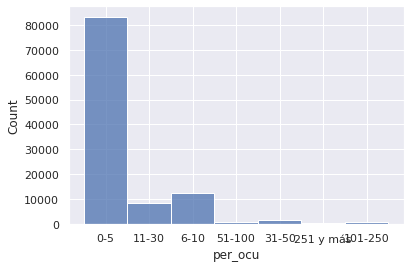

In [8]:
# Histogram 
order = ['0-5', '6-10', '11-30', '31-50', '51-100', '101-250', '251 y más']
sns.histplot(data = df, x = 'per_ocu')

El histograma anterior no ha desplegado los bines en el orden correcto debido a que la variable *x* consiste de strings y no de números. Por lo que se procederá a convertir los rangos en números.

In [9]:
# Función para convertir los rangos de personas empleadas en números enteros
def cleaner(x):
  r = list()
  if x == '251 y más':
    r.append(251)
  else:
    x = x.split('-')
    for i in x:
      r.append(int(i))
  
  return r

In [10]:
# Creación de una nueva columna con los promedios de los rangos de personas empleadas
df['per_ocu_int'] = df['per_ocu'].apply(lambda x: np.mean(cleaner(x)))
df['per_ocu_int'].head()

0     2.5
1     2.5
2    20.5
3     2.5
4     8.0
Name: per_ocu_int, dtype: float64

In [15]:
# Clasificacion de actividades por el INEGI
df['nombre_act'].value_counts()

Bufetes jurídicos                                                                                                                                         23759
Servicios de contabilidad y auditoría                                                                                                                     17236
Servicios veterinarios para mascotas prestados por el sector privado                                                                                      12025
Servicios de fotografía y videograbación                                                                                                                  11192
Servicios de consultoría en administración                                                                                                                 6208
Agencias de publicidad                                                                                                                                     4304
Diseño gráfico                          

En el presente estudio, se empleará la categoría **_"Servicios de diseño de sistemas de cómputo y servicios relacionados"_** del INEGI para efectuar los análisis posteriores debido a que es la más cercana a lo que se desea evaluar, que son las organizaciones oferentes de servicios en tecnologías de la información.

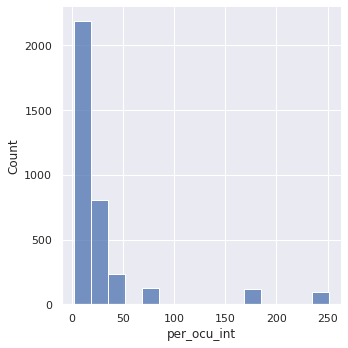

In [27]:
sns.displot(data = df[df['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'], x = 'per_ocu_int', bins = 15)

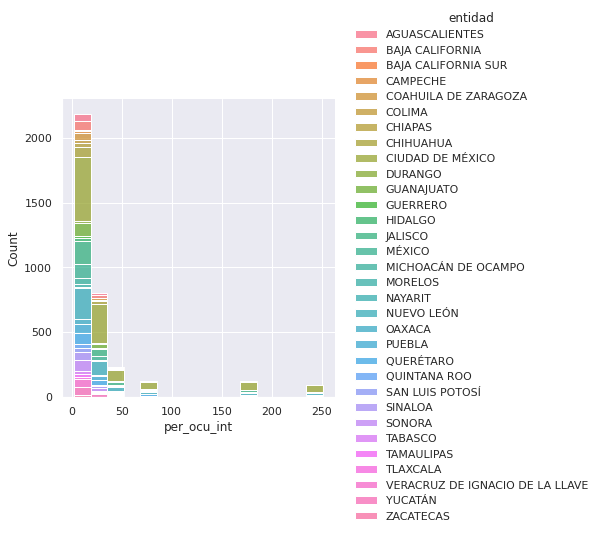

In [26]:
sns.displot(data = df[df['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'], 
            x = 'per_ocu_int', bins = 15, hue = 'entidad',  multiple="stack")

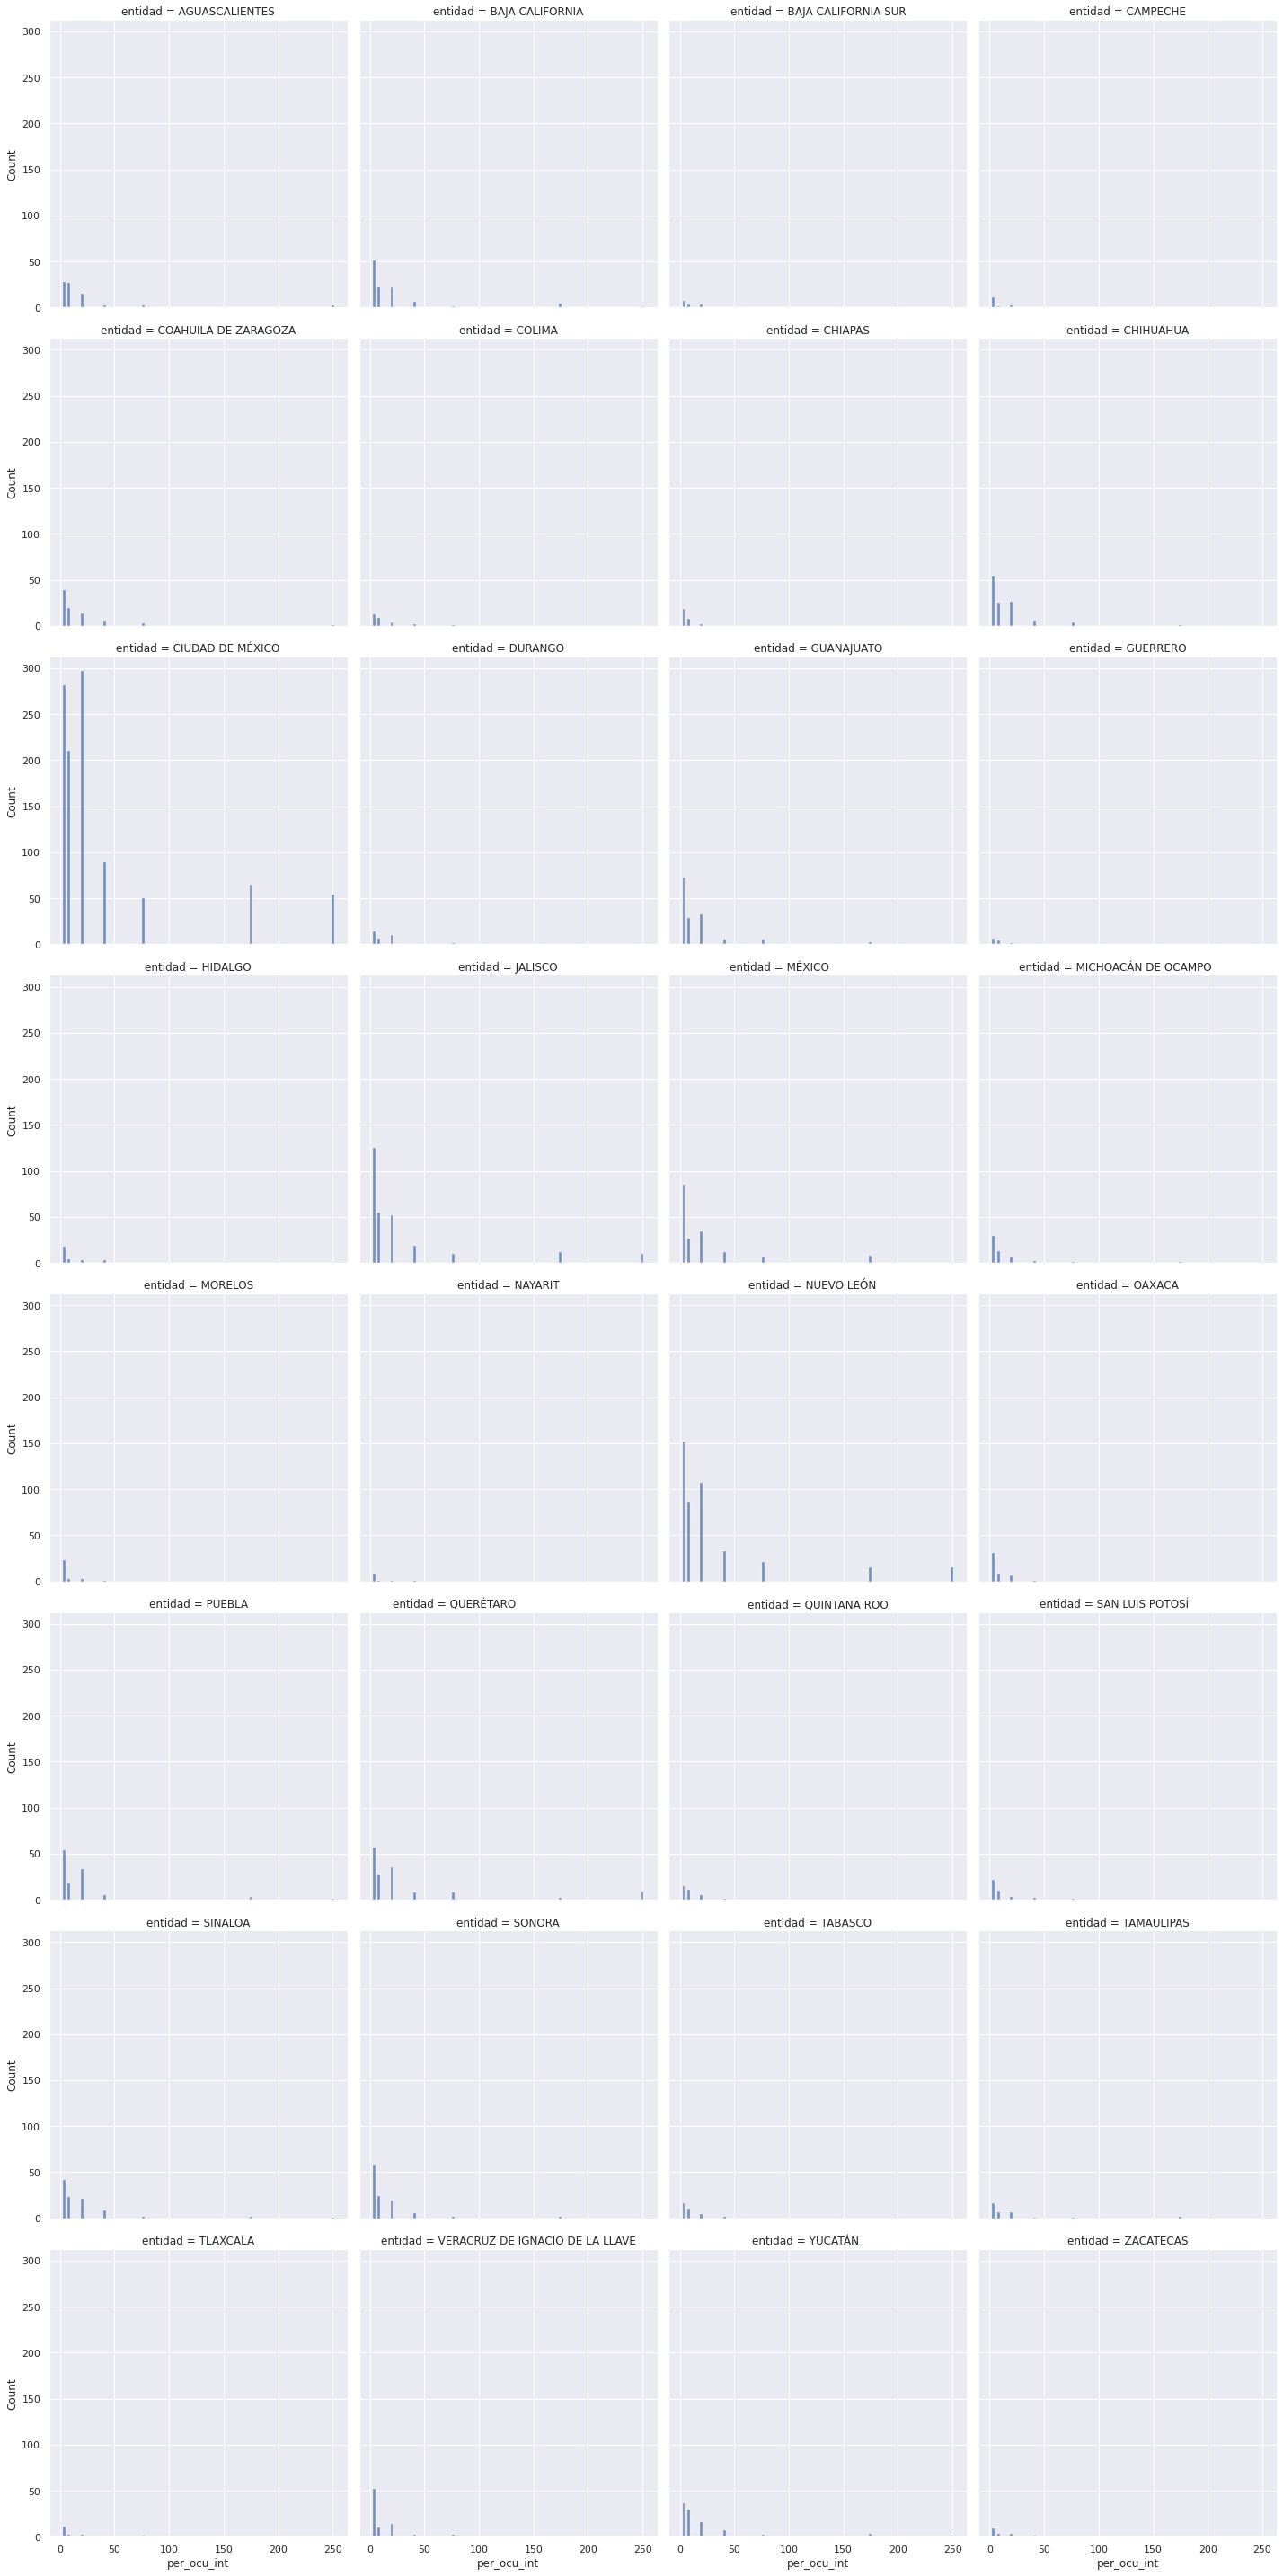

In [30]:
sns.displot(data = df[df['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'],
            x = 'per_ocu_int', col = 'entidad', col_wrap = 4)

## 2. Gráficas de dispersión

- Scatter plot
- Pairplot
- Displot en su modalidad tipo heatmap

In [71]:
df_scatter = df.groupby(by = 'nombre_act', as_index = False)[['per_ocu_int']].mean()

df_scatter.head()

,nombre_act,per_ocu_int
0,Agencias de anuncios publicitarios,12.564480
1,Agencias de compra de medios a petición del cl...,14.055556
2,Agencias de correo directo,6.949309
3,Agencias de publicidad,12.496747
4,Agencias de relaciones públicas,15.292683


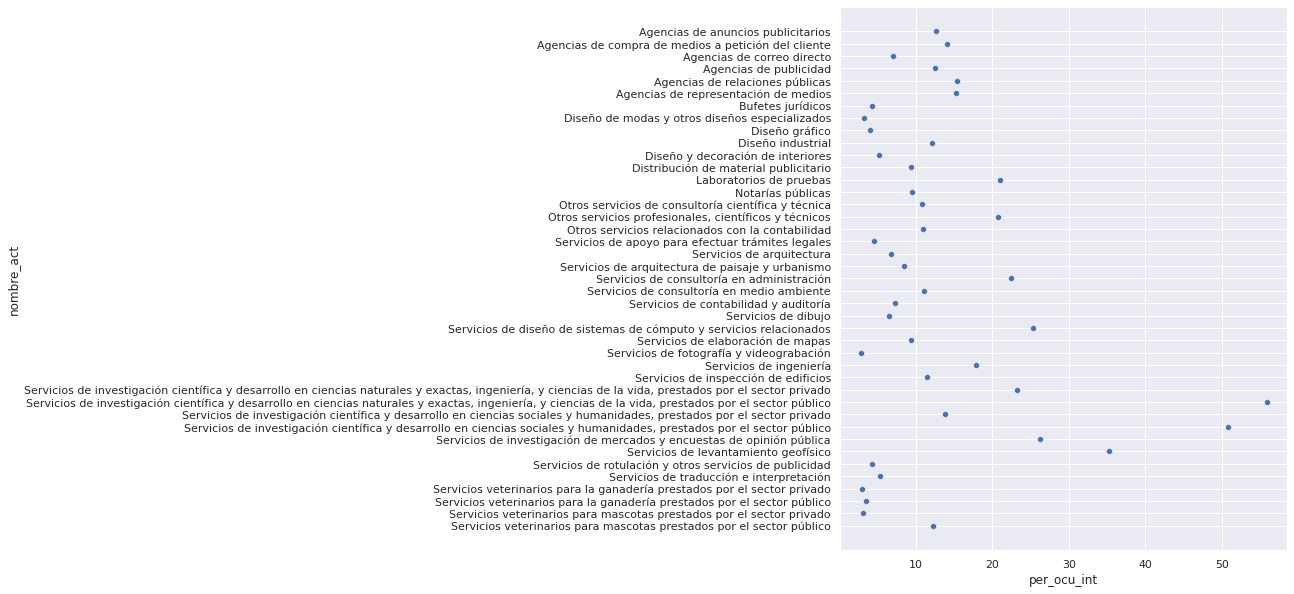

In [72]:
fig = plt.subplots(figsize = (8,10))
sns.scatterplot(data = df_scatter,
                x = 'per_ocu_int',
                y = 'nombre_act'
                )

In [74]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


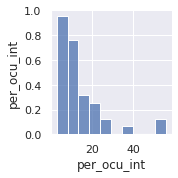

In [73]:
sns.pairplot(data = df_scatter,
                )

## 3. Serie de tiempo

Una serie de tiempo no es más que el cambio de una variable numérica a través de una variable temporal. Ya que cuentas con ambas, construyamos una de estas series.

Completa las siguientes tareas:
- Construye una serie de tiempo haciendo uso de la columna de fechas de tu conjunto de datos y alguna de las variables numéricas de tu interés.
- Realiza tantas series como creas conveniente para responder tus preguntas y saciar tu curiosidad 😉